<a href="https://colab.research.google.com/github/patricio-tech/proyectos/blob/master/BH2019_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demanda Belohorizonte Examen Pregunta 2

Edwin Solís

2020.09.05

2.	Dado el archivo “Belo Horizonte” del año 2019 realizar lo siguiente:

a.	Obtener los perfiles de demanda de cada uno de lo meses del año 2019 para días laborables y fines de semana más días festivos

b.	Obtener el promedio del perfil de demanda del año 2019 para días laborables y fines de semana más días festivos

c.	Realizar la curva monótona del alimentador Belo Horizonte

d.	Establecer los períodos pico, llano alto, llano bajo y valle para días laborables y fines de semana más días festivos

e.	En las curvas de la demanda tanto de los días laborables y fines de semana más días festivos graficar los períodos pico, llano alto, llano bajo y valle (ver las gráficas de la lámina No 9 de la presentación “Gestión_Demanda_TOU”.


In [ ]:
#@title
## Librerías
import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.dates import DateFormatter
from sklearn.cluster import SpectralClustering
import matplotlib.ticker as mtick
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url2 = 'https://raw.githubusercontent.com/esoliss/AMI/master/Dataset/holidaysEx.csv'
url = 'https://raw.githubusercontent.com/esoliss/AMI/master/Dataset/exambh2019.csv'
df = pd.read_csv(url, error_bad_lines=False)
#df = pd.read_csv(r'/Users/edwinsolis/Documents/Python/AMIdata/Data/belohorizonte2019.csv')
df = df.drop(columns=['Unnamed: 0','Timestamp','kVARh rec int','kWh rec int','kVAR sd rec'])
#df = df.drop(df.columns[-1],axis=1)
df = df.rename(columns={"kVAR sd del": "Q", "kVARh del int": "kVARh","kW sd del": "P","kWh del int": "kWh","kVA sd del": "S"})
df['Local Time'] = df['Local Time'].astype('datetime64[ns]')
var = list(df.columns)
va = {'Potencia Activa':var[3], 'Potencia Reactiva':var[1], 'Potencia Aparente': var[8], 'Voltaje An':var[5],
      'Voltaje Bn':var[6], 'Voltaje Cn':var[7], 'Corriente A':var[9], 'Corriente B':var[10], 'Corriente C':var[11],
      'Energía Activa':var[4], 'Energía Reactiva':var[3]}

# Variable pick
select = 'Potencia Activa' 
## Opciones:
#'Potencia Activa', 'Potencia Reactiva', 'Potencia Aparente', 'Voltaje An', 'Voltaje bn', 'Voltaje Cn'
#'Corriente A', 'Corriente B', 'Corriente C', 'Energía Activa', 'Energía Reactiva'

# SELECCIÓN

1: Días Laborables

0: Días no laborables y feriados

2: Datos completos

In [ ]:
dwt =0

In [ ]:
#@title
## Preparación de datos
mes_inicio = 1
dia_inicio = 1
mes_final = 12
dia_final = 31

dfil = df[['Local Time',va[select]]].copy()
dfil=dfil.fillna(dfil.mean())
dfil['Local Time'].iloc[-1]=datetime.datetime(2019,1,1,0,0)
n=0
for g in dfil[va[select]]:
    if g>2160:
        dfil[va[select]][n]=dfil.describe()[va[select]]['mean']
    if g<500:
        dfil[va[select]][n]=dfil.describe()[va[select]]['mean']-350
    n+=1
ini=datetime.datetime(2019,mes_inicio,dia_inicio,0,0)
fin=datetime.datetime(2019,mes_final,dia_final,0,0)
mask = (dfil["Local Time"]>=ini) & (dfil["Local Time"]<fin)
seq = dfil.loc[mask] 
### Curva monotona
t = 0
t = float(t)
y=0
xc =[]
seq.sort_values(by=[va[select]], inplace=True,ascending=False)
seq['x']=0
seq['x'].astype(float)
seq = seq.reset_index() 
for i in seq['x']:
    seq['x'][y]=t
    xc.append(t)
    y+=1
    t=t+0.0028618
seq['x']=seq.describe()[va[select]]['mean'] 

Curva monótona Anual

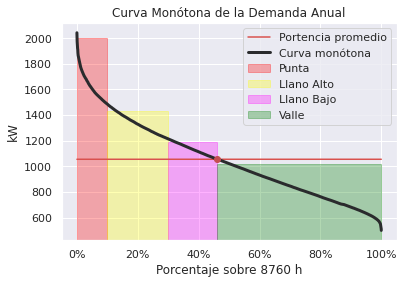

In [ ]:
#@title
## Curva monótona Anual
fig, ax = plt.subplots()
ax.plot(xc,seq['x'],color='#D9514EFF',label='Portencia promedio')   
ax.plot(xc,seq['P'],color='#2A2B2DFF',label='Curva monótona',linewidth=3)
#ax.axvspan(0, 10, ymin=0, ymax=700, alpha=0.4, color='red')
idx = np.argwhere(np.diff(np.sign(seq['x'] - seq['P']))).flatten()
ax.plot(xc[idx[0]], seq['P'][idx], 'ro')
ax.axvspan(0, 10, ymin=0, ymax=seq['P'][0]/2200, alpha=0.3, color='red',label='Punta')
ax.axvspan(10, 30, ymin=0, ymax=seq['P'][3495]/2500, alpha=0.3, color='yellow',label='Llano Alto')
ax.axvspan(30, xc[idx[0]], ymin=0, ymax=seq['P'][10483]/2700, alpha=0.3, color='magenta',label='Llano Bajo')
ax.axvspan(xc[idx[0]],100, ymin=0, ymax=seq['x'][0]/3000, alpha=0.3, color='green',label='Valle')
plt.title('Curva Monótona de la Demanda Anual')
ax.set_xlabel('Porcentaje sobre 8760 h')
ax.set_ylabel('kW')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.legend()
plt.show()   


In [ ]:
#@title
## Clasificación de días
wdm = pd.read_csv(url2, error_bad_lines=False)
wmk = wdm['type']==dwt
seq = dfil.loc[mask] 
if dwt == 0:
    tyt = "FINES DE SEMANA Y FERIADOS "
if dwt == 1:
    tyt = "DIAS LABORABLES "
if dwt == 2:
    tyt = "DIAS EN EL AÑO "
    aa=0
    for tt in wmk:
        wmk[aa] = True
        aa+=1
data = []
mry = []
for j in range(12):
    if (j == 0 or j==2 or j==4 or j==6 or j==7 or j==9 or j==11):
        fd = 31
    if j == 1:
        fd = 28
    if (j == 3 or j==5 or j==8 or j==10):
        fd =30
    tkk = []
    for di in range(fd):
        mes_inicio = j+1
        dia_inicio = di+1
        mes_final = mes_inicio
        dia_final = dia_inicio
        ini=datetime.datetime(2019,mes_inicio,dia_inicio,0,0)
        fin=datetime.datetime(2019,mes_final,dia_final,23,45)
        mask = (dfil["Local Time"]>=ini) & (dfil["Local Time"]<=fin)
        aux = dfil.loc[mask]
        aux = aux[va[select]].values
        data.append(aux)
        tkk.append(aux)
    mry.append(np.vstack(tkk))

def daterange(start_date, end_date):
    delta = datetime.timedelta(minutes=15)
    while start_date < end_date:
        yield start_date
        start_date += delta

start_date = datetime.datetime(2021, 1, 1, 00, 00)
end_date = datetime.datetime(2021, 1, 2, 00, 00)
z = list(daterange(start_date, end_date))
#for h in z:
#    z[z.index(h)]=h.strftime("%H:%M")
dayd = {'ref':z}
def daterange1(start_date, end_date):
    delta = datetime.timedelta(days=1)
    while start_date < end_date:
        yield start_date
        start_date += delta
start_date = datetime.datetime(2019,1,1)
end_date = datetime.datetime(2020,1,1)
fec = list(daterange1(start_date,end_date))
for h in fec:
    fec[fec.index(h)]=h.strftime("%m-%d")
dd = { i : data[fec.index(i)] for i in fec }
dayd.update(dd)

ndf = pd.DataFrame(dayd)

xndf = ndf.set_index('ref')
dt1 = pd.DataFrame(xndf.columns)
dg1 = dt1.iloc[wmk.values]            
xndf = xndf[list(dg1[0])] 

In [ ]:
mescl = []
for lofi in mry:
  evc = lofi.mean(axis=0)
  mescl.append(evc)

Gráfica de demanda diaria y mapa de calor anual

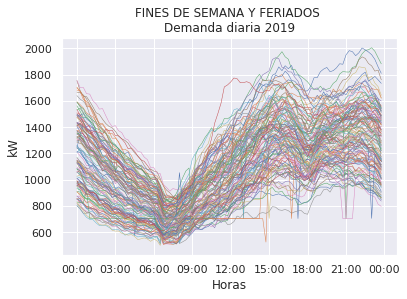

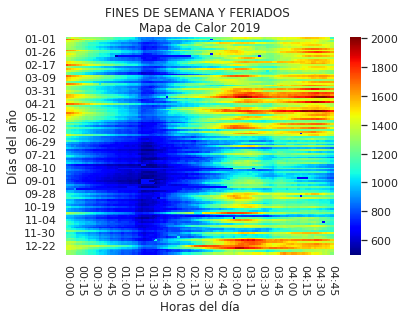

In [ ]:
#@title
## Datos clasificados por día
fig, ax = plt.subplots()
for key in xndf:
    if key != 'ref':
        ax.plot(ndf['ref'],xndf[key],linewidth=0.5)    
        date_form = DateFormatter("%H:00")
        plt.title(tyt+'\nDemanda diaria 2019')
        ax.xaxis.set_major_formatter(date_form)   
ax.set_xlabel('Horas')
ax.set_ylabel('kW')
plt.show()

ax = sns.heatmap(xndf.T,cmap='jet') #OrRd
ax.set_xticklabels(ndf['ref'].dt.strftime("%H:%M"))
plt.xticks(rotation=-90)
plt.title(tyt+'\nMapa de Calor 2019')
ax.set_xlabel('Horas del día')
ax.set_ylabel('Días del año')
plt.show()

Clusters de demanda

In [ ]:
#@title
## Clustering de datos
DataFrame = xndf.copy()
DataMatrix = DataFrame.values
sizeData = (DataMatrix.shape[0],DataMatrix.shape[1])
DeltaFault = DataMatrix
## Coherency matrix
n = DeltaFault.shape[1]
m = DeltaFault.shape[0]
C = np.zeros((xndf.shape[1],xndf.shape[1]))
for i in range(n):
    j = 0
    for j in range(n):
        k = 0
        for k in range(m):
            C[i][j] = C[i][j]+(DeltaFault[k][i]-DeltaFault[k][j])
            k+=1
        j+=1
    i+=1
Cnorm = C/(np.max(C))
S = np.identity(xndf.shape[1])-Cnorm
## Spectral Clustering
dc = SpectralClustering(1).fit_predict(S)

cldf = []
clme = []
for t in range (1):
    dt = pd.DataFrame(xndf.columns)
    mask = dc==t
    dg = dt.iloc[mask]            
    ndff = xndf[list(dg[0])]
    cldf.append(ndff)
    fgh = ndff.T.describe() 
    fgh = fgh.loc[['mean']].T
    clme.append(fgh)


Clasificación de areas en curvas de demanda

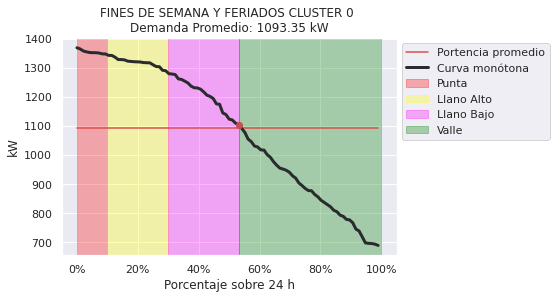

Demanda:  1093.35  kW


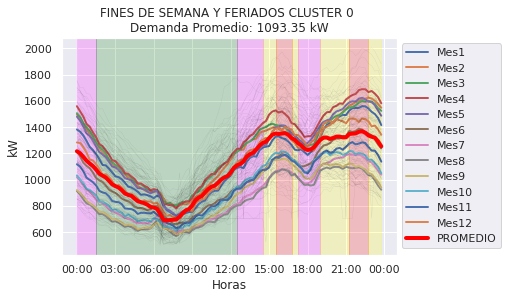

In [ ]:
#@title
## Graficas de la demanda

for m in range(1):
    fgh = clme[m]
    seq = clme[m].copy()
    t = 0
    t = float(t)
    y=0
    xc =[]
    seq.sort_values(by=['mean'], inplace=True,ascending=False)
    seq['x']=0
    seq['x'].astype(float)
    seq = seq.reset_index() 
    for i in seq['x']:
        seq['x'][y]=t
        xc.append(t)
        y+=1
        t=t+1.04167
    seq['x']=seq.describe()['mean']['mean'] 
    fig, ax = plt.subplots()
    ax.plot(xc,seq['x'],color='#D9514EFF',label='Portencia promedio')   
    ax.plot(xc,seq['mean'],color='#2A2B2DFF',label='Curva monótona',linewidth=3)
    #ax.axvspan(0, 10, ymin=0, ymax=700, alpha=0.4, color='red')
    idx = np.argwhere(np.diff(np.sign(seq['x'] - seq['mean']))).flatten()
    ax.plot(xc[idx[0]], seq['mean'][idx], 'ro')
    ax.axvspan(0, 10, ymin=0, ymax=3000, alpha=0.3, color='red',label='Punta')
    ax.axvspan(10, 30, ymin=0, ymax=3000, alpha=0.3, color='yellow',label='Llano Alto')
    ax.axvspan(30, xc[idx[0]], ymin=0, ymax=3000, alpha=0.3, color='magenta',label='Llano Bajo')
    ax.axvspan(xc[idx[0]],100, ymin=0, ymax=3000, alpha=0.3, color='green',label='Valle')
    plt.title(tyt+'CLUSTER '+str(m)+' \nDemanda Promedio: '+str(np.round(fgh.describe()['mean']['mean'],2))+' kW')
    ax.set_xlabel('Porcentaje sobre 24 h')
    ax.set_ylabel('kW')
    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax.xaxis.set_major_formatter(xticks)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()   
    zon = fgh.copy()
    a1 = seq['mean'][10]
    a3 = seq['mean'][29]
    a4 = seq['mean'][idx[0]]
    zon['zone']=100
    du = 0
    for dlp in zon['mean']:
        if dlp >= a1:
            zon['zone'][du]=1
        if (dlp<a1 and dlp>=a3):
            zon['zone'][du]=2
        if (dlp<a3 and dlp>=a4):
            zon['zone'][du]=3
        if dlp < a4:
            zon['zone'][du]=4
        du+=1
    fig, ax = plt.subplots()     
    ndff = cldf[m]
    fgh = clme[m]
    for im in range(12):
        ax.plot(z,mescl[im],linewidth=2,label='Mes'+str(im+1))
    ax.plot(ndff,color='black', alpha=0.1,linewidth=0.3)
    ax.plot(fgh,color='red',linewidth=4,label='PROMEDIO')
    lim = zon['zone'].diff()[zon['zone'].diff() != 0].index.values
    for it in range(lim.size-1):
        if zon['zone'][lim[it]] == 1:
            core = 'red'
            #labl ='Punta'
        if zon['zone'][lim[it]] == 2:
            core = 'yellow'
            #labl ='Llano Alto'
        if zon['zone'][lim[it]] == 3:
            core = 'magenta'
            #labl ='Llano Bajo'
        if zon['zone'][lim[it]] == 4:
            core ='green'
            #labl ='Valle'
        ax.axvspan(lim[it],lim[it+1], ymin=0, ymax=3000, alpha=0.2, color=core)
        
    plt.title(tyt+'CLUSTER '+str(m)+' \nDemanda Promedio: '+str(np.round(fgh.describe()['mean']['mean'],2))+' kW')
    print('Demanda: ',np.round(fgh.describe()['mean']['mean'],2),' kW')
    date_form = DateFormatter("%H:00")
    ax.xaxis.set_major_formatter(date_form)
    ax.set_xlabel('Horas')
    ax.set_ylabel('kW')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()    


